In [4]:
#设计并实现一个用于回归任务的全连接神经网络，其结构如下：

#输入层：10 个神经元
#（对应每个样本的 10 维特征）

#隐藏层 1：7 个神经元，激活函数使用 ReLU

#隐藏层 2：5 个神经元，激活函数使用 Tanh

#输出层：1 个神经元，输出为一个标量（不经过激活函数，因为回归任务的输出通常直接为线性值）

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [6]:
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(10, 7)
    self.layer2 = nn.Linear(7, 5)
    self.layer3 = nn.Linear(5, 1)

  def forward(self, x):
    x = torch.relu(self.layer1(x))
    x = torch.tanh(self.layer2(x))
    x = self.layer3(x)
    return x

epoch: 1 loss: 1.6050
epoch: 101 loss: 1.1429
epoch: 201 loss: 0.6734
epoch: 301 loss: 0.3796
epoch: 401 loss: 0.1557
epoch: 501 loss: 0.0517
epoch: 601 loss: 0.0218
epoch: 701 loss: 0.0108
epoch: 801 loss: 0.0055
epoch: 901 loss: 0.0028

 the final value is:
tensor([[ 0.9337],
        [ 0.9094],
        [ 2.3800],
        [-1.1806],
        [ 2.2027],
        [ 1.1664],
        [-1.8747],
        [-1.4576],
        [-0.3517],
        [-0.2364],
        [-0.6038],
        [-0.0300],
        [ 0.6389],
        [-0.6788],
        [-0.0155],
        [-0.5875]], grad_fn=<AddmmBackward0>)

 the true value is:
tensor([[ 0.9098],
        [ 0.9188],
        [ 2.3799],
        [-1.2914],
        [ 2.2068],
        [ 1.1761],
        [-1.9243],
        [-1.4468],
        [-0.3591],
        [-0.2314],
        [-0.5278],
        [-0.0337],
        [ 0.6376],
        [-0.6683],
        [ 0.0073],
        [-0.5830]])


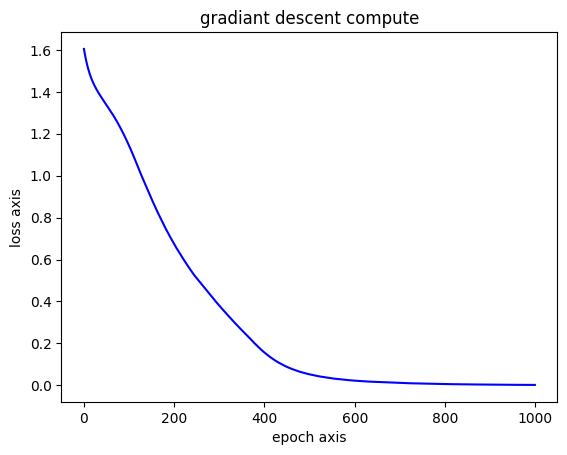

In [10]:
#数据准备：

#随机生成一个输入数据张量 x，形状为 (16, 10) ，即 16 个样本，每个样本 10 维特征（使用 torch.randn 即可）。

#随机生成目标输出 y，形状为 (16, 1) ，由 torch.randn 生成。
x = torch.randn(16, 10)
y_true = torch.randn(16, 1)

model = SimpleNN()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr =0.01)

epochs = 1000
losses = []

for epoch in range(epochs):
  y_pred = model(x)

  loss = criterion(y_pred, y_true)
  losses.append(loss.item())

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch%100 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}")


final_prediction = model(x)
print("\n the final value is:")
print(final_prediction)

print("\n the true value is:")
print(y_true)

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.title("gradiant descent compute")
plt.show()